**OUTLINE**
1. Get Data + Pre-Processing
2. Sentiment analysis Tensorflow
3. Extractive summarization for Positive, Neutral, Negative tweets from sentiment analysis tensorflow divide

### 1. GET DATA & PREPROCESSING

In [ ]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.graph_objs as go
import plotly.express    as px 
import nltk
import re
import string

from scipy.stats import norm
from wordcloud   import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob
import re
from collections import Counter

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from IPython.display import Markdown as md

In [ ]:
# Read data
data = pd.read_csv('Macron.csv')

In [ ]:
data['original_text'] = data['text'].copy()

In [ ]:
data.head()

,user,date,text,user_location,favorite_count,number_followers,is_retweet,hashtags,source,original_text
0,DrLoupis,Thu Mar 23 21:36:05 +0000 2023,Over a million French protesters gather in Par...,"København, Danmark",50407,285662,False,[],Twitter for iPhone,Over a million French protesters gather in Par...
1,bennyjohnson,Fri Mar 24 01:13:52 +0000 2023,The sum of all fears for globalist technocrats...,Tampa Florida,27384,1391419,False,[],Twitter for iPhone,The sum of all fears for globalist technocrats...
2,BernieSpofforth,Thu Mar 23 23:01:30 +0000 2023,FRANCE - The firefighters follow the police an...,"North West, England",24930,196109,False,[],Twitter for iPhone,FRANCE - The firefighters follow the police an...
3,BernieSpofforth,Fri Mar 24 12:19:29 +0000 2023,MACRON - Oops the moment Macron realises he’s ...,"North West, England",12298,196109,False,[],Twitter for iPhone,MACRON - Oops the moment Macron realises he’s ...
4,DrLoupis,Fri Mar 24 13:28:18 +0000 2023,Millions of people on the streets in Paris. Th...,"København, Danmark",13340,285662,False,[],Twitter for iPhone,Millions of people on the streets in Paris. Th...


In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
punc=string.punctuation
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Make text lowercase, remove text in square brackets,remove links,remove punctuation and remove words containing numbers.

def clean_text(text):
    
    #lower case
    text = text.lower()
    # remove text with square brackets
    text = re.sub('\[.*?\]', '', text)
    # remove URLs
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # remove HTML tags
    text = re.sub('<.*?>+', '', text)
    # remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # remove newline characters
    text = re.sub('\n', '', text)
    # remove numeric sequences
    text = re.sub('\w*\d\w*', '', text)
    #Removing stopwords
    text=" ".join([word for word in str(text).split() if word not in stop_words])  
    #Stemming
    text = " ".join([stemmer.stem(word) for word in text.split()])
    #Lemmatization
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    
    return text

data['text'] = data['text'].apply(lambda x: clean_text(x))

In [ ]:
# Removing emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

data['text']=data['text'].apply(lambda x: remove_emoji(x))

### 2. SENTIMENT ANALYSES USE TENSORFLOW

In [ ]:
!pip install keras
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow.keras
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import string
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#  Load a saved model that was previously trained tweets sentiment analysis
import tensorflow
from tensorflow.keras.models import load_model

model_new = load_model("sentiment_model.h5")

In [ ]:
model_new.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 500)]             0         
                                                                 
 embedding (Embedding)       (None, 500, 50)           100000    
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

**Preparing the input features**
- We converting the text words into arrays form.
- Maximum 500 features/words selected for training.

In [ ]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(data['text'])
sequences = tok.texts_to_sequences(data['text'])
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
sequences_matrix

array([[ 0,  0,  0, ..., 12, 19, 20],
       [ 0,  0,  0, ...,  6, 14, 27],
       [ 0,  0,  0, ..., 10,  4, 31],
       ...,
       [ 0,  0,  0, ...,  6,  4, 41],
       [ 0,  0,  0, ...,  1, 16, 45],
       [ 0,  0,  0, ..., 12, 19, 20]], dtype=int32)

In [ ]:
# Make predictions
predictions = model_new.predict(sequences_matrix)



63/63 [==============================] - 7s 97ms/step


In [ ]:
# Store the predictions in a new column
data["sentiment"] = predictions

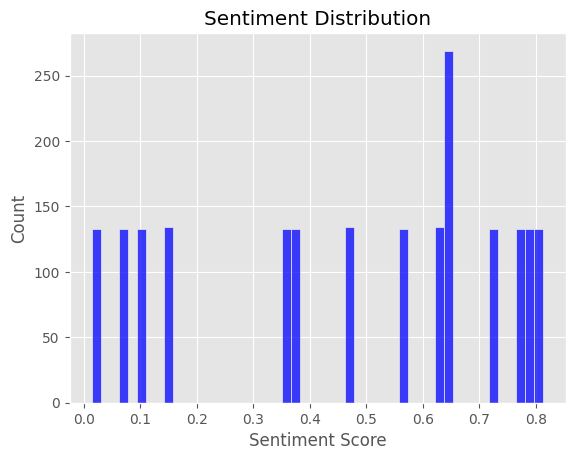

In [ ]:
# Create a histogram of sentiment scores
sns.histplot(data['sentiment'], bins=50, color='blue')

# Set labels and title
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.title('Sentiment Distribution')

# Display the graph
plt.show()

In [ ]:
# Setting threshold: More than 0.7 - positive tweets(1), lower 0.3 - negative tweets(-1), between 0.3 and 0.7 - Neutral tweets (0)
# Create a new column called 'sentiment_divide' that has values of -1, 0, 1

data['sentiment_divide'] = data['sentiment'].apply(lambda x: 1 if x > 0.7 else -1 if x < 0.3 else 0).astype(int)


In [ ]:
data[['text','sentiment', 'sentiment_divide']].head()

,text,sentiment,sentiment_divide
0,million french protest gather pari call remov ...,0.642151,0
1,sum fear globalist technocrat happen right fra...,0.473745,0
2,franc firefight follow polic begin stand choos...,0.621833,0
3,macron oop moment macron realis he’ wear expen...,0.155854,-1
4,million peopl street pari want dictat emmanuel...,0.648481,0


In [ ]:
# Calculate the frequency of each value in the 'sentiment_divide' column
counts = pd.DataFrame(data['sentiment_divide'].value_counts()).rename({'sentiment_divide': 'count'}, axis=1)

# Create a list of labels based on the values in the 'sentiment_divide' column
labels = ['Negative' if x == -1 else 'Neutral' if x == 0 else 'Positive' for x in counts.index]

# Add the 'label' column to the 'counts' DataFrame
counts['label'] = labels

# Display the updated 'counts' DataFrame
counts

,count,label
0,936,Neutral
-1,533,Negative
1,532,Positive


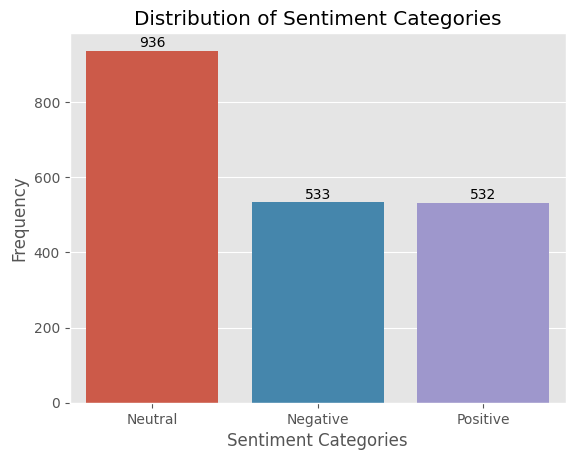

In [ ]:

# Create barplot of sentiment counts ['Neutral','Positive', 'Negative']
ax = sns.barplot(data= counts, x=counts.label , y=counts['count'])
plt.xlabel('Sentiment Categories')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Categories')

# add value on top of each bar
for i, v in enumerate(counts['count']):
    ax.text(i, v+10, str(v), ha='center')

plt.show()

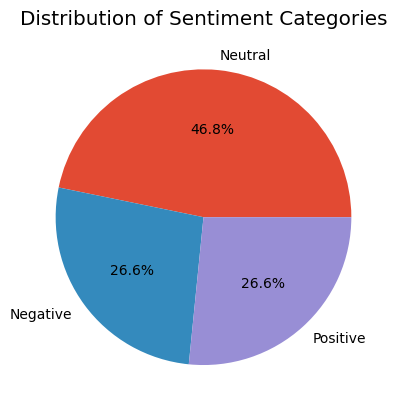

In [ ]:
# Calculate the percentage of each value in the 'sentiment_divide' column
percentages = data['sentiment_divide'].value_counts(normalize=True) * 100

# Create a pie chart of the 'sentiment_divide' column
plt.pie(percentages.values, labels=counts.label, autopct='%1.1f%%')
plt.title('Distribution of Sentiment Categories')

# Show the plot
plt.show()


### 3. EXTRACTIVE SUMMARIZATION FOR POSITIVE, NEUTRAL AND NEGATIVE TWEETS

In [ ]:
import nltk
import bs4
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import requests
from bs4 import BeautifulSoup
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def GenerateWordFrequencyDistribution(text):
    stops = set(stopwords.words("english"))
    words = word_tokenize(text) #tokenize text by words
    freqTable = dict()

    for word in words: #Itterate through all words in text
        word = word.lower() #Convert word to lowercase
        if word not in stops: #Ignore stopwords
            if word in freqTable:
                freqTable[word] += 1 #Add one to the word frequency if it has already been added to before
            else:
                freqTable[word] = 1  #Set the word frequency to one if it has not already been added to before
    return freqTable


def CalculateSentenceImportance (text, freqTable):
    sents = sent_tokenize(text)
    sentScores = dict()
    
    for sent in sents:
        for word, freq in freqTable.items():
            if word in sent.lower():
                if sent in sentScores:
                    sentScores[sent] += freq #Add the frequency of a word occuring to the sentence score if it has been added to before
                else: 
                    sentScores[sent] = freq  #Set score of a sentence to the score of the first word occuring in the sentence
    return sentScores, sents


def CalculateAverageSentenceImportance (sentScores):
    sumValues = 0
    for sentence in sentScores:
        sumValues += sentScores[sentence] #Calculate total sentence values
        
    return (sumValues / len(sentScores)) #Return average sentence value


def PerformExtractiveSummarisation(sentences, sentScores, average):
    summary = ""
    for sent in sentences:
        if (sentScores[sent] > (1.25 * average)): #Check if the sentence has a score greater than 1.5 times the average.
            summary += sent + " "
            
    return summary

In [ ]:
# Make text lowercase, remove text in square brackets,remove links.

def clean_text_2(text):
    text = text.lower() #lower case   
    text = re.sub('\[.*?\]', '', text) # remove text with square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text) # remove URLs
    text = re.sub('<.*?>+', '', text) # remove HTML tags
    text = re.sub('\n', '', text) # remove newline characters
    text=" ".join([word for word in str(text).split() if word not in stop_words])  #Removing stopwords
    return text
    
data['original_text'] = data['original_text'].apply(lambda x: clean_text_2(x))
data['original_text']=data['original_text'].apply(lambda x: remove_emoji(x))

In [ ]:
data['original_text'].head()

0    million french protesters gather paris calling...
1    sum fears globalist technocrats happening righ...
2    france - firefighters follow police begin stan...
3    macron - oops moment macron realises he’s wear...
4    millions people streets paris. want dictator e...
Name: original_text, dtype: object

**Extractive Summarization for Positive tweets**

In [ ]:
# Combine the text rows into a single paragraph
Text_positive = '. '.join(data['original_text'][data['sentiment_divide']==1].apply(str))

#Generate a frequency distribution based on previously acquired text
FreqTable = GenerateWordFrequencyDistribution(Text_positive)

#Generate sentence values for each sentence in text back on frequency of work occurance.
sentScores, Sentences = CalculateSentenceImportance(Text_positive, FreqTable)

#Calculate the average sentence importance
AverageValue = CalculateAverageSentenceImportance(sentScores)

#Perform Extractive Summarisation on sentences and determine which sentences to keep and which to remove, returns a summary.
Summary = PerformExtractiveSummarisation(Sentences,sentScores, AverageValue)
Summary

"macron slowly surely turning france violent dictatorship. riot police signal support protesters.. 9 million people wrong! france covered protests strikes macron said there's money allow workers retire at…. macron slowly surely turning france violent dictatorship. riot police signal support protesters.. 9 million people wrong! france covered protests strikes macron said there's money allow workers retire at…. macron slowly surely turning france violent dictatorship. riot police signal support protesters.. 9 million people wrong! france covered protests strikes macron said there's money allow workers retire at…. macron slowly surely turning france violent dictatorship. riot police signal support protesters.. 9 million people wrong! france covered protests strikes macron said there's money allow workers retire at…. macron slowly surely turning france violent dictatorship. riot police signal support protesters.. 9 million people wrong! france covered protests strikes macron said there's m

**Extractive Summarization for Neutral tweets**

In [ ]:
# Combine the text rows into a single paragraph
Text_neutral = '. '.join(data['original_text'][data['sentiment_divide']==0].apply(str))

#Generate a frequency distribution based on previously acquired text
FreqTable = GenerateWordFrequencyDistribution(Text_neutral)

#Generate sentence values for each sentence in text back on frequency of work occurance.
sentScores, Sentences = CalculateSentenceImportance(Text_neutral, FreqTable)

#Calculate the average sentence importance
AverageValue = CalculateAverageSentenceImportance(sentScores)

#Perform Extractive Summarisation on sentences and determine which sentences to keep and which to remove, returns a summary.
Summary = PerformExtractiveSummarisation(Sentences,sentScores, AverageValue)
Summary

'million french protesters gather paris calling removal macron dictator. sum fears globalist technocrats happening right france.the french firefighters riot…. france - firefighters follow police begin stand down, choosing stand people instead.…. million french protesters gather paris calling removal macron.. syria libya -this france. million french protesters gather paris calling removal macron dictator. sum fears globalist technocrats happening right france.the french firefighters riot…. france - firefighters follow police begin stand down, choosing stand people instead.…. million french protesters gather paris calling removal macron.. syria libya -this france. million french protesters gather paris calling removal macron dictator. sum fears globalist technocrats happening right france.the french firefighters riot…. france - firefighters follow police begin stand down, choosing stand people instead.…. million french protesters gather paris calling removal macron.. syria libya -this fr

**Extractive Summarization for Negative tweets**

In [ ]:
# Combine the text rows into a single paragraph
Text_negative = '. '.join(data['original_text'][data['sentiment_divide']==-1].apply(str))

#Generate a frequency distribution based on previously acquired text
FreqTable = GenerateWordFrequencyDistribution(Text_negative)

#Generate sentence values for each sentence in text back on frequency of work occurance.
sentScores, Sentences = CalculateSentenceImportance(Text_negative, FreqTable)

#Calculate the average sentence importance
AverageValue = CalculateAverageSentenceImportance(sentScores)

#Perform Extractive Summarisation on sentences and determine which sentences to keep and which to remove, returns a summary.
Summary = PerformExtractiveSummarisation(Sentences,sentScores, AverageValue)
Summary

'macron - oops moment macron realises he’s wearing expensive watch whilst telling french people must…. france - today day whole france strikes.millions people stand macron, circu…. whole france behind anti-reform movement… macron lost control country. macron - oops moment macron realises he’s wearing expensive watch whilst telling french people must…. france - today day whole france strikes.millions people stand macron, circu…. whole france behind anti-reform movement… macron lost control country. macron - oops moment macron realises he’s wearing expensive watch whilst telling french people must…. france - today day whole france strikes.millions people stand macron, circu…. whole france behind anti-reform movement… macron lost control country. macron - oops moment macron realises he’s wearing expensive watch whilst telling french people must…. france - today day whole france strikes.millions people stand macron, circu…. whole france behind anti-reform movement… macron lost control coun